# Runtime and Metrics comparison between the first ComCamSim DRP and the w_2024_04 DC2. 

This notebook contains some quick aggregation and plotting of the usage statistics generated with `build-gather-resource-usage-qg `.

In [1]:
from lsst.daf.butler import Butler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

butlerdc2 = Butler('/repo/dc2', collections=['2.2i/runs/test-med-1/w_2024_04/DM-42670'])
butleror3 = Butler('/repo/ops-rehearsal-3-prep', collections=['u/homer/htc-test1'])

In [2]:
## Nate, There's a consolidated table that looks like this
df = butleror3.get("ResourceUsageSummary")
df

,task,quanta,integrated_runtime_hrs,mem_GB_p000,mem_GB_p001,mem_GB_p005,mem_GB_p032,mem_GB_p050,mem_GB_p068,mem_GB_p095,...,mem_GB_p100,runtime_s_p000,runtime_s_p001,runtime_s_p005,runtime_s_p032,runtime_s_p050,runtime_s_p068,runtime_s_p095,runtime_s_p099,runtime_s_p100
0,analyzeMatchedVisitCore,25,32.362735,0.833916,0.837080,0.854372,1.485058,2.019470,4.387092,40.971201,...,51.603874,8.593106,8.659124,8.925836,53.664380,177.058563,1793.891213,28733.410191,34978.453958,36129.369205
1,analyzeObjectTableCore,28,0.209005,0.447735,0.568298,0.894380,0.973206,1.041201,1.565621,2.820378,...,2.839859,0.000000,4.696142,17.780592,21.217888,23.439692,27.916033,49.051976,74.215570,81.945043
2,analyzeObjectTableSurveyCore,1,0.013806,1.926991,1.926991,1.926991,1.926991,1.926991,1.926991,1.926991,...,1.926991,49.700964,49.700964,49.700964,49.700964,49.700964,49.700964,49.700964,49.700964,49.700964
3,assembleCoadd,1058,280.449249,0.458908,0.460533,1.276797,2.093616,3.716118,7.063607,45.528664,...,142.696056,0.000000,0.000000,25.941337,235.756910,642.146402,1310.619283,2520.388678,5006.878129,5766.831617
4,bfkSolve,9,0.003660,0.345490,0.345539,0.345735,0.346259,0.346607,0.347628,0.348826,...,0.349194,1.433762,1.434030,1.435104,1.455043,1.462501,1.470844,1.495441,1.501307,1.502774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,writeForcedSourceOnDiaObjectTable,39104,2.762964,0.506603,0.695686,0.699521,0.709698,0.716770,0.727784,0.807430,...,0.860462,0.000000,0.043047,0.049718,0.107082,0.150223,0.226644,0.884200,1.042308,1.349513
63,writeForcedSourceTable,39091,20.878487,0.673573,0.809382,1.027113,1.568785,1.712654,1.857674,2.227863,...,2.573738,0.055235,0.070878,0.084627,1.427673,2.167299,2.581099,3.520466,3.975811,5.529937
64,writeObjectTable,373,1.497732,0.379990,0.380332,0.383177,1.053248,2.791344,5.184287,7.996281,...,11.559799,0.000000,0.000000,0.000000,5.566082,11.573840,19.941881,35.666108,47.264255,65.422313
65,writePreSourceTable,25935,2.655658,1.603985,1.626305,1.627932,1.633514,1.637928,1.642621,1.729218,...,3.520603,0.172203,0.207837,0.229141,0.277244,0.310938,0.395917,0.636362,0.734362,1.067071


In [3]:
# but I'm going to jsut rerun my usual from before that existed to make the plots I'm familiar with
# without a lot of extra work
res = butleror3.registry.queryDatasetTypes() 
resList = list(set(res))

In [4]:
label = [("compareObjectToTruth", "analysis"),
    ("analyzeObjectTableCore", "analysis"), 
("histPlot_skyObject", "analysis"),
("matchObjectToTruth", "analysis"),
("match_astromRefCat_objectTable", "analysis"),
("plot_CModel_sub_PSFmag_meas_sky_galaxies", "analysis"),
("plot_CModel_sub_PSFmag_meas_sky_stars", "analysis"),
("plot_CircAp12_sub_PSF_meas_calib_psf_used_all_scatter", "analysis"),
("plot_CircAp12_sub_PSF_meas_calib_psf_used_sky_all", "analysis"),
("plot_CircAp12_sub_PSF_meas_gals_scatter", "analysis"),
("plot_CircAp12_sub_PSF_meas_sky_gals", "analysis"),
("plot_CircAp12_sub_PSF_meas_sky_stars", "analysis"),
("plot_CircAp12_sub_PSF_meas_stars_scatter", "analysis"),
("plot_E1Diff_magDiff_scatter", "analysis"),
("plot_E1Diff_scatter", "analysis"),
("plot_E1Diff_sky", "analysis"),
("plot_E2Diff_magDiff_scatter", "analysis"),
("plot_E2Diff_scatter", "analysis"),
("plot_E2Diff_sky", "analysis"),
("plot_PSFFluxSN_meas_sky_all", "analysis"),
("plot_RhoStatistics", "analysis"),
("plot_astromRefCat_scatter_tract_dDec", "analysis"),
("plot_astromRefCat_scatter_tract_dRA", "analysis"),
("plot_astromRefCat_sky_tract_dDec", "analysis"),
("plot_astromRefCat_sky_tract_dRA", "analysis"),
("plot_ri_gr_cmodel", "analysis"),
("plot_ri_gr_psf", "analysis"),
("plot_shapeSizeFractionalDiff_magDiff_scatter", "analysis"),
("plot_shapeSizeFractionalDiff_scatter", "analysis"),
("plot_shapeSizeFractionalDiff_sky", "analysis"),
("plot_wFit_CModel", "analysis"),
("plot_wFit_PSF", "analysis"),
("plot_xFit_CModel", "analysis"),
("plot_xFit_PSF", "analysis"),
("plot_yFit_CModel", "analysis"),
("plot_yFit_PSF", "analysis"),
("skyPlot_skyObject", "analysis"),
("assembleCoadd", "drp"),
("calibrate", "drp"),
("characterizeImage", "drp"),
("consolidateAssocDiaSourceTable", "drp"),
("consolidateDiaSourceTable", "drp"),
("consolidateForcedSourceOnDiaObjectTable", "drp"),
("consolidateForcedSourceTable", "drp"),
("consolidateFullDiaObjectTable", "drp"),
("consolidateHealSparsePropertyMaps", "drp"),
("consolidateObjectTable", "drp"),
("consolidateSourceTable", "drp"),
("consolidateVisitSummary", "drp"),
("deblend", "drp"),
("detectAndMeasureDiaSources", "drp"),
("detection", "drp"),
("drpAssociation", "drp"),
("drpDiaCalculation", "drp"),
("finalizeCharacterization", "drp"),
("forcedPhotCcd", "drp"),
("forcedPhotCcdOnDiaObjects", "drp"),
("forcedPhotCoadd", "drp"),
("forcedPhotDiffOnDiaObjects", "drp"),
("forcedPhotDiffim", "drp"),
("getTemplate", "drp"),
("healSparsePropertyMaps", "drp"),
("isolatedStarAssociation", "drp"),
("isr", "drp"),
("makeCcdVisitTable", "drp"),
("makeVisitTable", "drp"),
("makeWarp", "drp"),
("measure", "drp"),
("mergeDetections", "drp"),
("mergeMeasurements", "drp"),
("selectGoodSeeingVisits", "drp"),
("subtractImages", "drp"),
("templateGen", "drp"),
("transformDiaSourceCat", "drp"),
("transformForcedSourceOnDiaObjectTable", "drp"),
("transformForcedSourceTable", "drp"),
("transformObjectTable", "drp"),
("transformSourceTable", "drp"),
("writeForcedSourceOnDiaObjectTable", "drp"),
("writeForcedSourceTable", "drp"),
("writeObjectTable", "drp"),
("writeSourceTable", "drp"),
         
("AB1", "faro"),
("AD1_design", "faro"),
("AD2_design", "faro"),
("AD3_design", "faro"),
("AF1_design", "faro"),
("AF2_design", "faro"),
("AF3_design", "faro"),
("AM1", "faro"),
("AM2", "faro"),
("AM3", "faro"),
("PA1", "faro"),
("PF1_design", "faro"),
("TE1", "faro"),
("TE2", "faro"),
("TE3", "faro"),
("TE4", "faro"),
("matchCatalogsPatch", "faro"),
("matchCatalogsPatchMultiBand", "faro"),
("matchCatalogsTract", "faro"),
("matchCatalogsTractGxsSNR5to80", "faro"),
("matchCatalogsTractMag17to21p5", "faro"),
("matchCatalogsTractStarsSNR5to80", "faro"),
("modelPhotRepGal1", "faro"),
("modelPhotRepGal2", "faro"),
("modelPhotRepGal3", "faro"),
("modelPhotRepGal4", "faro"),
("modelPhotRepStar1", "faro"),
("modelPhotRepStar2", "faro"),
("modelPhotRepStar3", "faro"),
("modelPhotRepStar4", "faro"),
("nsrcMeasVisit", "faro"),
("psfPhotRepStar1", "faro"),
("psfPhotRepStar2", "faro"),
("psfPhotRepStar3", "faro"),
("psfPhotRepStar4", "faro"),
("skyObjectMean", "faro"),
("skyObjectStd", "faro"),
("wPerp", "faro"),
('transformPreSourceTable', "drp"),
('writeRecalibratedSourceTable', "drp"),
('jointcal', "drp"),
('fgcmOutputProducts', "drp"),
('fgcmFitCycle', "drp"),
('writePreSourceTable', "drp"),
('skyCorr', "drp"),
('consolidatePreSourceTable', "drp"),
('fgcmBuildStarsTable', "drp"),
('analyzeObjectTableSurveyCore', "analysis"),
('refCatObjectTract', "analysis"),
('updateVisitSummary', "drp"),
('validateObjectTableCore', "analysis"),
('analyzeMatchedVisitCore', "analysis"),
('fgcmBuildFromIsolatedStars', "drp"),
('selectDeepCoaddVisits', "drp"),
('gbdesAstrometricFit', "drp"),
('catalogMatchTract', "analysis"),

]

labelDF = pd.DataFrame(label)
labelDF.columns = ['task', 'label']

In [5]:

def makeqq(butler, resList):
    quantileList = []
    for rname in [r.name for r in resList if r.name.endswith('usage')]:
        if "gatherResourceUsage" in rname:
            continue
        try:
            parq = butler.get(rname)
        except Exception as e:
            print(e)
            continue
        df = parq.quantile([0,0.01,0.05,.32,.50,.68,.95,.99, 1], numeric_only=True).reset_index()
        df['task'] = rname.replace('_resource_usage', '')
        df['quanta'] = len(parq)
        df['integrated_runtime'] = parq["run_time"].sum()
        quantileList.append(df[["index", "quanta", "task", "memory", "init_time", "run_time", 'integrated_runtime']])

    qq = pd.concat(quantileList)
    qq["memoryGB"] = qq['memory']/1073741824
    qq['integrated_runtime_hrs'] = qq['integrated_runtime']/3600.
    return qq

def pivot(qq, labelDF):
    memoryGB = pd.pivot_table(qq, values='memoryGB', columns=['index'], index=['task'])
    runtime = pd.pivot_table(qq, values='run_time', columns=['index'], index=['task'])
    memoryGB = memoryGB.add_prefix('memGB_')
    runtime = runtime.add_prefix('runtime_')

    memrun = pd.merge(memoryGB.reset_index(), runtime.reset_index())
    memrun = pd.merge(qq[['task','quanta', 'integrated_runtime_hrs']].drop_duplicates().sort_values('task'), memrun)
    #memrun = pd.merge(labelDF, memrun)
    return memrun

qqor3 = makeqq(butleror3, resList)
memrunor3 = pivot(qqor3, labelDF)

qqdc2 = makeqq(butlerdc2, resList)
memrundc2 = pivot(qqdc2, labelDF)

"Dataset type with name 'darkIsr_resource_usage' not found."
"Dataset type with name 'biasIsr_resource_usage' not found."
"Dataset type with name 'flatIsr_resource_usage' not found."
"Dataset type with name 'cpDarkCombine_resource_usage' not found."
"Dataset type with name 'transformPreSourceTable_resource_usage' not found."
"Dataset type with name 'writePreSourceTable_resource_usage' not found."
"Dataset type with name 'bfkSolve_resource_usage' not found."
"Dataset type with name 'writeRecalibratedSourceTable_resource_usage' not found."
"Dataset type with name 'consolidatePreSourceTable_resource_usage' not found."
"Dataset type with name 'cpFlatCombine_resource_usage' not found."
"Dataset type with name 'cpBiasCombine_resource_usage' not found."
"Dataset type with name 'ptcIsr_resource_usage' not found."
"Dataset type with name 'cpFlatNorm_resource_usage' not found."
"Dataset type with name 'ptcSolve_resource_usage' not found."
"Dataset type with name 'ptcPlot_resource_usage' not foun

## Tasks that take more that 4 GB of memory

These can't be taken too literall because clustering was on. 

Something is wrong with the "coadd" cluster: assemble, templateGen, and detection. 
Jira is down at the moment so I can't file a ticket, but I'll look into it and put a proposal on `u/yusra/coadd-configs` for now. Maybe Jim was onto something with those 2k patches. 

In [6]:

memrun = memrunor3
memrun["kb99"] = memrun["memGB_0.99"]*1024
memrun["kb100"] = memrun["memGB_1.0"]*1024
memrun["kb95"] = memrun["memGB_0.95"]*1024
memrun[memrun["memGB_0.95"] > 4][["task", "quanta", "kb100", "kb99", "kb95"]].sort_values("kb100") 

,task,quanta,kb100,kb99,kb95
43,measure,1058,6574.203125,6206.228594,5646.714258
33,forcedPhotCoadd,1055,7372.628906,6810.360938,6078.612891
29,finalizeCharacterization,2882,7994.421875,7746.268047,6926.418164
13,consolidateObjectTable,28,9299.773438,9240.347070,8983.881055
57,transformForcedSourceTable,332,9397.167969,7651.990977,5847.470898
36,getTemplate,25935,9593.902344,7891.637266,6634.692187
64,writeObjectTable,373,11837.234375,8656.467812,8188.192187
58,transformObjectTable,373,11837.234375,8656.467812,8188.192187
24,deblend,376,12467.953125,10580.534180,8173.358398
25,detectAndMeasureDiaSources,25935,13673.707031,11017.424375,9211.800781


### what should we update in the bps/resource requests?

In [7]:


import yaml

#file_path = "/sdf/group/rubin/user/yusra/lsst_devel/drp_pipe/bps/resources/HSC/DRP-RC2.yaml"
file_path = "/sdf/group/rubin/user/yusra/lsst_devel/drp_pipe/bps/resources/LSSTCam-imSim/DRP-test-med-1.yaml"
with open(file_path, 'r') as yaml_file:
    yaml_data = yaml.safe_load(yaml_file)

df = pd.DataFrame(yaml_data)
df = df.reset_index()
df.columns = ["task", "memory_request"]
pd.merge(memrun[memrun["memGB_0.95"] > 4][["task", "quanta", "kb100",  "kb99", "kb95"]], df, 
         how="left", left_on="task", right_on="task")

,task,quanta,kb100,kb99,kb95,memory_request
0,analyzeMatchedVisitCore,25,52842.367188,50989.017812,41954.510156,{'requestMemory': 8192}
1,assembleCoadd,1058,146120.761719,100016.756641,46621.352148,NaN
2,consolidateObjectTable,28,9299.773438,9240.347070,8983.881055,{'requestMemory': 16384}
3,deblend,376,12467.953125,10580.534180,8173.358398,{'requestMemory': 14000}
4,detectAndMeasureDiaSources,25935,13673.707031,11017.424375,9211.800781,NaN
5,detection,1058,148509.339844,107162.187461,57505.696484,{'requestMemory': 8000}
6,finalizeCharacterization,2882,7994.421875,7746.268047,6926.418164,NaN
7,forcedPhotCoadd,1055,7372.628906,6810.360938,6078.612891,{'requestMemory': 10000}
8,getTemplate,25935,9593.902344,7891.637266,6634.692187,NaN
9,healSparsePropertyMaps,88,27582.457031,26142.243398,13187.464062,{'requestMemory': 8192}


In [8]:
qqor3['version'] = "u/homer/htc-test1: w_2024_08"
qqdc2['version'] = "DC2 w_2024_04"
both = pd.concat([qqor3, qqdc2])

In [9]:
mergedqq =  pd.merge(both, labelDF, left_on="task", right_on="task", how="left")

In [10]:
# are there any tasks that haven't been labeled?
mergedqq.task[mergedqq.label.isna()].unique()

array(['darkIsr', 'biasIsr', 'flatIsr', 'cpDarkCombine', 'bfkSolve',
       'cpFlatCombine', 'cpBiasCombine', 'ptcIsr', 'cpFlatNorm',
       'ptcSolve', 'ptcPlot', 'cpDark', 'ptcExtract', 'cpFlatMeasure'],
      dtype=object)

In [11]:
mergedqq

,index,quanta,task,memory,init_time,run_time,integrated_runtime,memoryGB,integrated_runtime_hrs,version,label
0,0.00,1,makeVisitTable,3.401875e+10,0.000298,499.029308,499.029308,31.682430,0.138619,u/homer/htc-test1: w_2024_08,drp
1,0.01,1,makeVisitTable,3.401875e+10,0.000298,499.029308,499.029308,31.682430,0.138619,u/homer/htc-test1: w_2024_08,drp
2,0.05,1,makeVisitTable,3.401875e+10,0.000298,499.029308,499.029308,31.682430,0.138619,u/homer/htc-test1: w_2024_08,drp
3,0.32,1,makeVisitTable,3.401875e+10,0.000298,499.029308,499.029308,31.682430,0.138619,u/homer/htc-test1: w_2024_08,drp
4,0.50,1,makeVisitTable,3.401875e+10,0.000298,499.029308,499.029308,31.682430,0.138619,u/homer/htc-test1: w_2024_08,drp
...,...,...,...,...,...,...,...,...,...,...,...
1039,0.50,588,templateGen,2.044488e+09,0.001486,110.625890,71612.610128,1.904078,19.892392,DC2 w_2024_04,drp
1040,0.68,588,templateGen,2.333165e+09,0.001579,125.145763,71612.610128,2.172929,19.892392,DC2 w_2024_04,drp
1041,0.95,588,templateGen,3.776692e+09,0.001856,192.092948,71612.610128,3.517319,19.892392,DC2 w_2024_04,drp
1042,0.99,588,templateGen,4.226057e+09,0.002055,228.459852,71612.610128,3.935822,19.892392,DC2 w_2024_04,drp


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-8.0.0/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


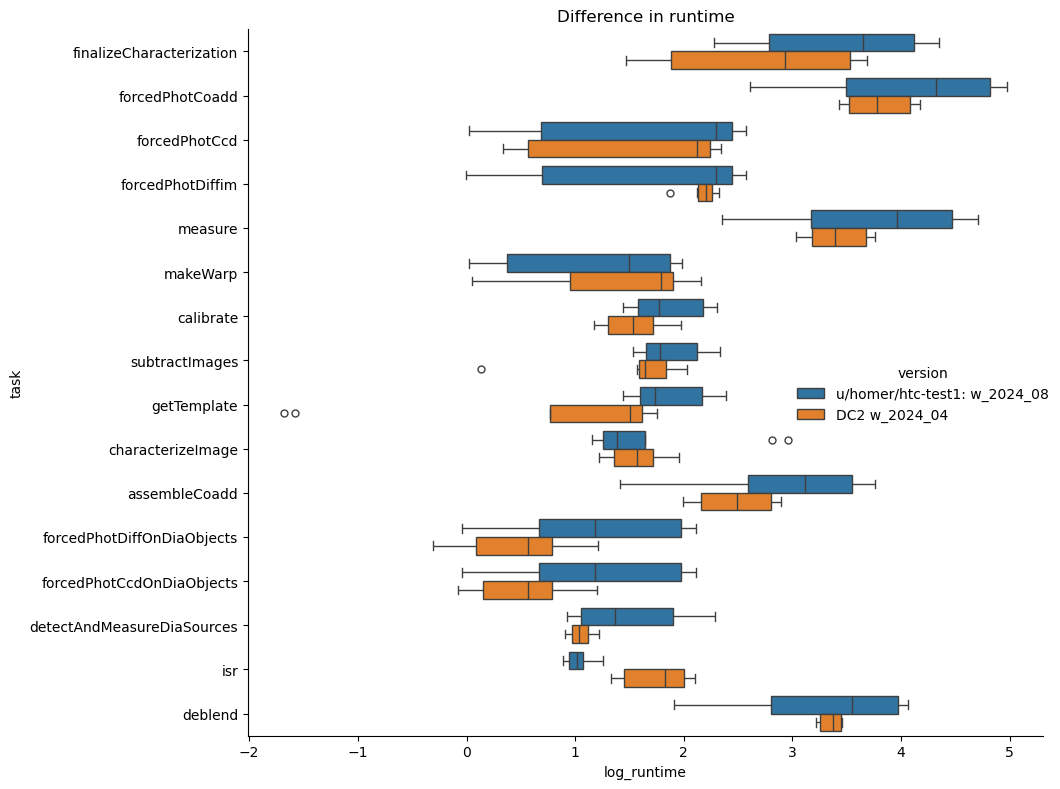

In [12]:
mergedqq =  pd.merge(both, labelDF, left_on="task", right_on="task", how="left")
import numpy as np
mergedqq['task-quanta'] = mergedqq['task'] + ' ' + mergedqq['quanta'].apply(lambda x: str(x))
mergedqq['log_runtime'] = np.log10(mergedqq['run_time'])

sns.catplot(data=mergedqq[(mergedqq.task.isin(mergedqq[(mergedqq.integrated_runtime_hrs > 100)]["task"].unique()))  &(mergedqq.label == "drp") & (mergedqq.task != "consolidateForcedSourceTable") &
                               (mergedqq.task != "consolidateForcedSourceOnDiaObjectTable")].sort_values('integrated_runtime', ascending=False), 
            y="task", x="log_runtime", hue="version", height=8,  kind="box")

plt.title("Difference in runtime")
plt.tight_layout()

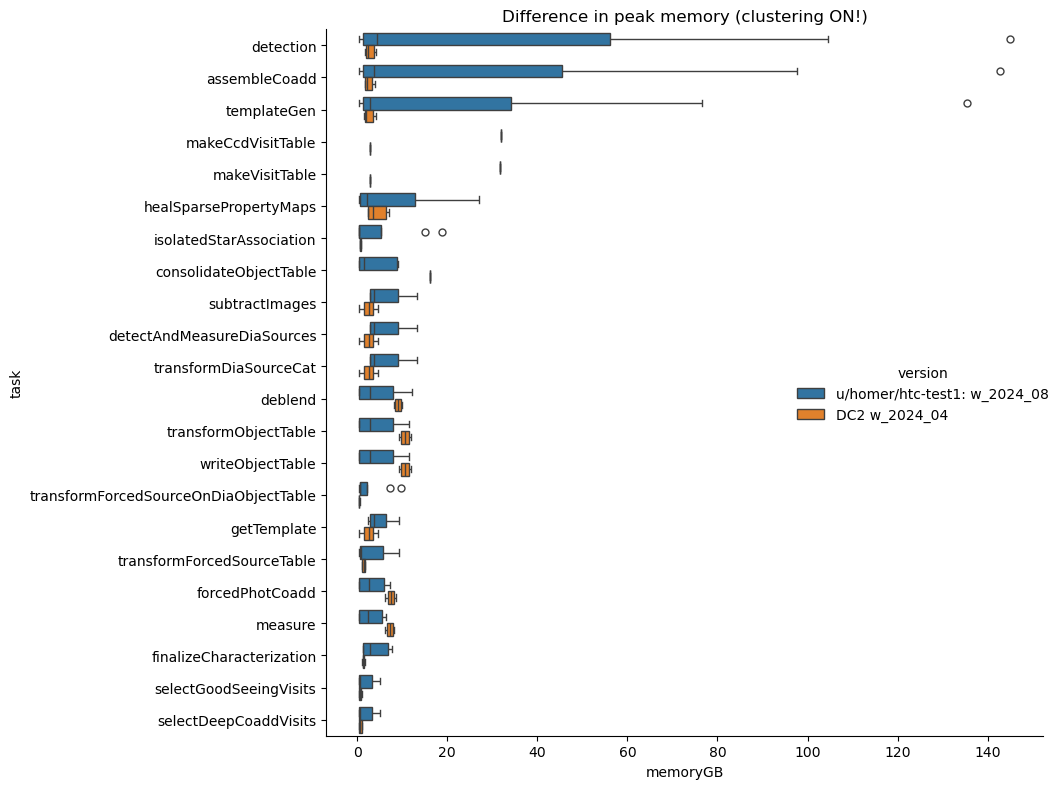

In [13]:

mergedqq =  pd.merge(both, labelDF, left_on="task", right_on="task", how="left")
mergedqq['task-quanta'] = mergedqq['task'] + ' ' + mergedqq['quanta'].apply(lambda x: str(x))
ax = sns.catplot(data=mergedqq[(mergedqq.task.isin(mergedqq[(mergedqq.memoryGB > 4)]["task"].unique())) &
                                (mergedqq.label == "drp") & (mergedqq.task != "consolidateForcedSourceTable") & (mergedqq.task != "consolidateForcedSourceOnDiaObjectTable")].sort_values('memoryGB', ascending=False), 
            y="task", x="memoryGB", hue="version", height=8, kind="box")

plt.title("Difference in peak memory (clustering ON!)")
plt.tight_layout()


In [14]:
# find some bad patches to test coadd configs on
df  = butleror3.get("assembleCoadd_resource_usage")
df.sort_values("memory")

,band,skymap,tract,patch,memory,init_time,run_time
280,g,DC2,9813,1,4.927488e+08,0.000000,0.000000
480,i,DC2,3533,30,4.936827e+08,0.000000,0.000000
614,i,DC2,9590,24,4.938424e+08,0.000000,0.000000
864,r,DC2,7148,0,4.941742e+08,0.000000,0.000000
768,r,DC2,3346,44,4.941865e+08,0.000000,0.000000
...,...,...,...,...,...,...,...
466,i,DC2,3533,10,1.255956e+11,0.001712,4851.627399
460,i,DC2,3533,3,1.264538e+11,0.001675,5333.641584
110,g,DC2,3533,9,1.272021e+11,0.001777,5639.294737
465,i,DC2,3533,9,1.435684e+11,0.001595,5565.016114
